[Plot] Subplots <br />
將塞太多組別的圖，拆成多張檢視 <br />
[教學目標] <br />
以下程式碼將示範如何將多張圖形, 使用 Subplot 與其參數排定顯示相對位置 <br />
[範例重點] <br />
傳統的 subplot 三碼 (row,column,idx) 繪製法 (In[6], Out[6]) <br />
subplot index 超過 10 以上的繪圖法 (In[7], Out[7]) <br />

In [2]:
#import modules we need
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings

plt.style.use('ggplot')
warnings.filterwarnings('ignore')

data_dir = './data/'

In [3]:
#getting our dataset
f_app = os.path.join(data_dir,'application_train.csv')
df = pd.read_csv(f_app)
df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Absolute value of days birth
df['DAYS_BIRTH'] = abs(df['DAYS_BIRTH'])

In [6]:
age_data = df[['TARGET','DAYS_BIRTH']] #subset
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / (365)
#cutting 11 points within 20-70
age_data['YEARS_BINNED'] = pd.cut(age_data.YEARS_BIRTH, np.linspace(20,70,11))
print(age_data.YEARS_BINNED.value_counts())
age_data.head(5)

(35.0, 40.0]    42868
(40.0, 45.0]    41406
(30.0, 35.0]    39440
(45.0, 50.0]    35135
(50.0, 55.0]    34942
(55.0, 60.0]    33120
(25.0, 30.0]    32862
(60.0, 65.0]    27476
(20.0, 25.0]    12159
(65.0, 70.0]     8103
Name: YEARS_BINNED, dtype: int64


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"


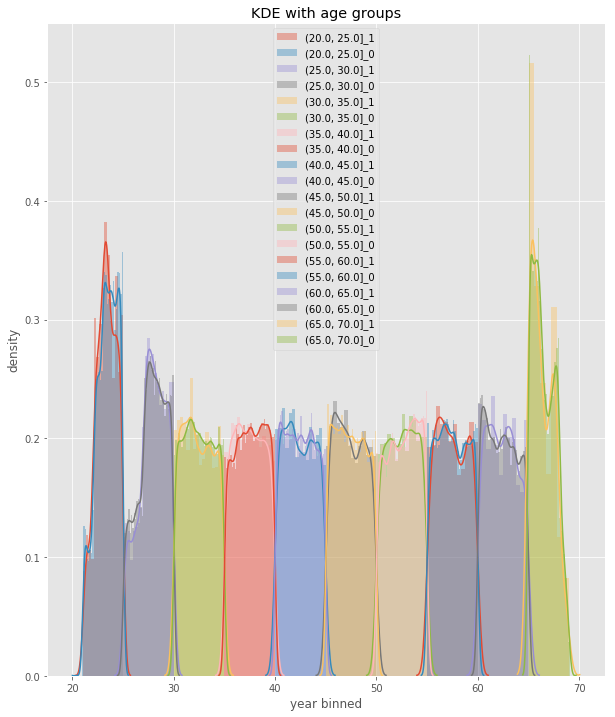

In [10]:
#sorting the index of years intervals
year_group_sorted = np.sort(age_data.YEARS_BINNED.unique())

#plot 10 kde curve after years birth had been group
plt.figure(figsize=(10,12))
for interval in year_group_sorted:
    sns.distplot(age_data.loc[ (age_data['YEARS_BINNED'] == interval) & (age_data['TARGET'] == 1) , 'YEARS_BIRTH' ] ,\
                 label = str(interval) + '_1' )
    sns.distplot(age_data.loc[ (age_data['YEARS_BINNED'] == interval) & (age_data['TARGET'] == 0) , 'YEARS_BIRTH' ] ,\
                 label = str(interval) + '_0')
plt.xlabel('year binned')
plt.ylabel('density')
plt.title('KDE with age groups')
plt.legend()
plt.show()

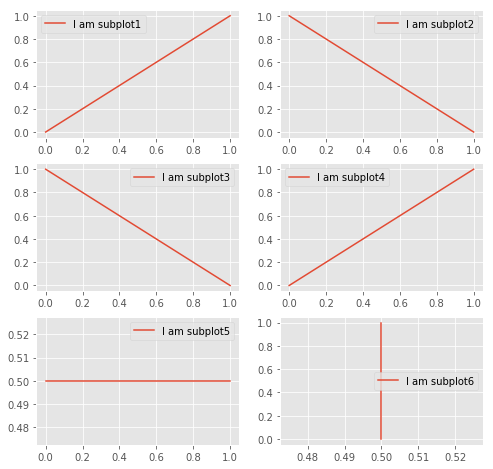

In [12]:
# 每張圖大小為 8x8
plt.figure(figsize=(8,8))

# plt.subplot 三碼如上所述, 分別表示 row總數, column總數, 本圖示第幾幅(idx)
plt.subplot(321)
plt.plot([0,1],[0,1], label = 'I am subplot1')
plt.legend()

plt.subplot(322)
plt.plot([0,1],[1,0], label = 'I am subplot2')
plt.legend()

plt.subplot(323)
plt.plot([1,0],[0,1], label = 'I am subplot3')
plt.legend()

plt.subplot(324)
plt.plot([1,0],[1,0], label = 'I am subplot4')
plt.legend()

plt.subplot(325)
plt.plot([0,1],[0.5,0.5], label = 'I am subplot5')
plt.legend()

plt.subplot(326)
plt.plot([0.5,0.5],[0,1], label = 'I am subplot6')
plt.legend()

plt.show()

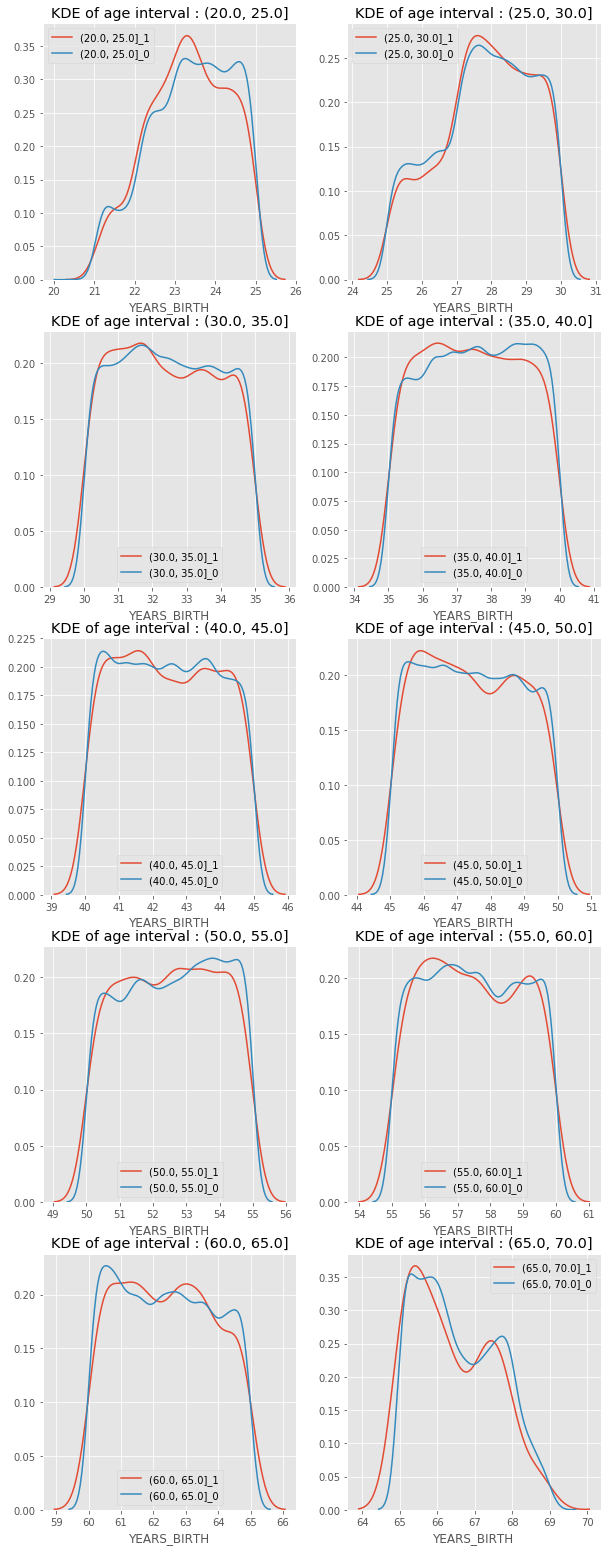

In [17]:
nrows = len(year_group_sorted) / 2 +1
ncols = 2

plt.figure(figsize = (10,33))
for i, interval in enumerate(year_group_sorted):
    plt.subplot(nrows,ncols,i+1)
    sns.distplot(age_data.loc[ (age_data.TARGET == 1) & (age_data.YEARS_BINNED == interval), 'YEARS_BIRTH' ] , label = str(interval) + '_1' \
                ,hist = False)
    sns.distplot(age_data.loc[ (age_data.TARGET == 0) & (age_data.YEARS_BINNED == interval), 'YEARS_BIRTH'] ,label = str(interval) + '_0' \
                ,hist = False)
    plt.title('KDE of age interval : ' + str(interval))
    plt.legend()
plt.show()

**作業** <br />
請使用 application_train.csv, 根據不同的 HOUSETYPE_MODE 對 AMT_CREDIT 繪製 Histogram <br />
**[作業目標]** <br />
試著調整資料, 並利用提供的程式繪製分布圖<br />
**[作業重點]** <br />
如何將列出相異的 HOUSETYPE_MODE 類別 (In[3]) <br />
如何依照不同的 HOUSETYPE_MODE 類別指定資料, 並繪製長條圖(.hist())? (In[3])<br />

In [27]:
print(df.HOUSETYPE_MODE.value_counts(),'\n')
print(df.AMT_CREDIT.describe())

block of flats      150503
specific housing      1499
terraced house        1212
Name: HOUSETYPE_MODE, dtype: int64 

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64


In [21]:
#First, we can check the number of nan data in HOUSETYPE_MODE
print(np.sum(df.HOUSETYPE_MODE.isnull()))

154297


In [29]:
sub_df = df[['HOUSETYPE_MODE','AMT_CREDIT']]
sub_df.HOUSETYPE_MODE = sub_df.HOUSETYPE_MODE.fillna('NA')
sub_df.HOUSETYPE_MODE.value_counts()

NA                  154297
block of flats      150503
specific housing      1499
terraced house        1212
Name: HOUSETYPE_MODE, dtype: int64

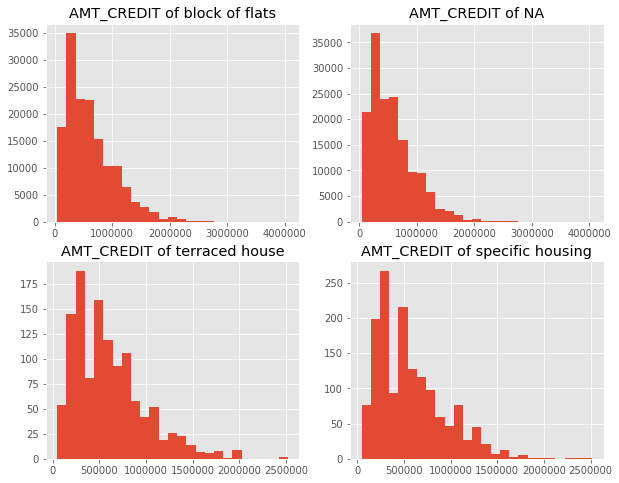

In [34]:
house_types = sub_df.HOUSETYPE_MODE.unique()

nrows = len(house_types) / 2 + len(house_types) %2
ncols = 2
plt.figure(figsize = (10,8))
for i,ht in enumerate(house_types):
    plt.subplot(nrows,ncols,i+1)
    plt.hist(sub_df.loc[sub_df.HOUSETYPE_MODE == ht, 'AMT_CREDIT'],bins = 25)
    plt.title('AMT_CREDIT of ' + str(ht))
plt.show()